<a href="https://colab.research.google.com/github/pearllpatell/Pearl_Patel_Portfolio/blob/main/NBA%20Player%20Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This project shows statistics from the NBA.

There are bar graphs and histographs as they were the best form of example for the comparsions and visualizations I have created.

This dataset is used from Kaggle.com. https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats?resource=download

The data shows the player play by play stats (starting from 1997) - percentage of time spent at different positions, fouls drawn & committed, and more.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Player Play By Play.csv')

In [ ]:
# Handling missing values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Adjust this according to your dataset's specifics.
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Removing duplicate rows
df = df.drop_duplicates()

# Optionally, check and correct data types
df['season'] = df['season'].astype(str)

print(df.head())


   seas_id season  player_id         player  birth_year pos  age  experience  \
0    31136   2024       5025     A.J. Green      1980.0  SG   24           2   
1    31137   2024       5026    A.J. Lawson      1980.0  SG   23           2   
2    31138   2024       5027     AJ Griffin      1980.0  SF   20           2   
3    31139   2024       4219   Aaron Gordon      1980.0  PF   28          10   
4    31140   2024       4582  Aaron Holiday      1980.0  PG   27           6   

    lg   tm  ...  net_plus_minus_per_100_poss  bad_pass_turnover  \
0  NBA  MIL  ...                         -2.9                  2   
1  NBA  DAL  ...                          4.7                  7   
2  NBA  ATL  ...                         -6.7                  3   
3  NBA  DEN  ...                         11.9                 32   
4  NBA  HOU  ...                          5.6                 24   

   lost_ball_turnover  shooting_foul_committed  offensive_foul_committed  \
0                   2             

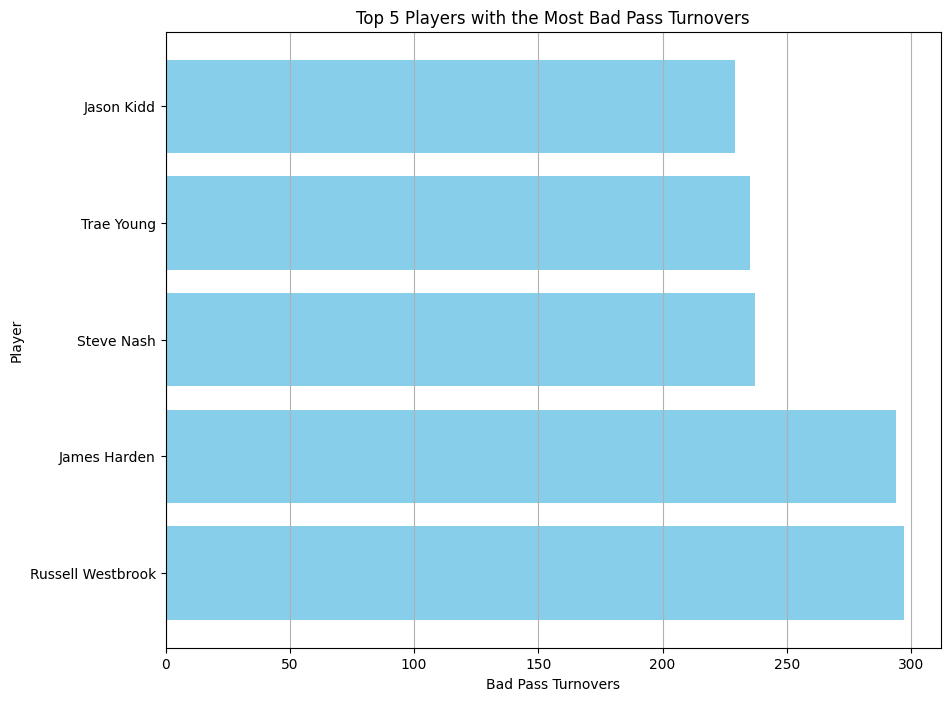

In [ ]:
# Sorting and selecting the top 5 players for bad pass turnovers and lost ball turnovers
top_bad_pass = df.sort_values(by='bad_pass_turnover', ascending=False).head(6) #The count is at 6 because some players have similar numbers that causes only 5 to show up.

# Plotting the chart for bad pass turnovers
plt.figure(figsize=(10, 8))
plt.barh(top_bad_pass['player'], top_bad_pass['bad_pass_turnover'], color='skyblue')
plt.xlabel('Bad Pass Turnovers')
plt.ylabel('Player')
plt.title('Top 5 Players with the Most Bad Pass Turnovers')
plt.grid(axis='x')



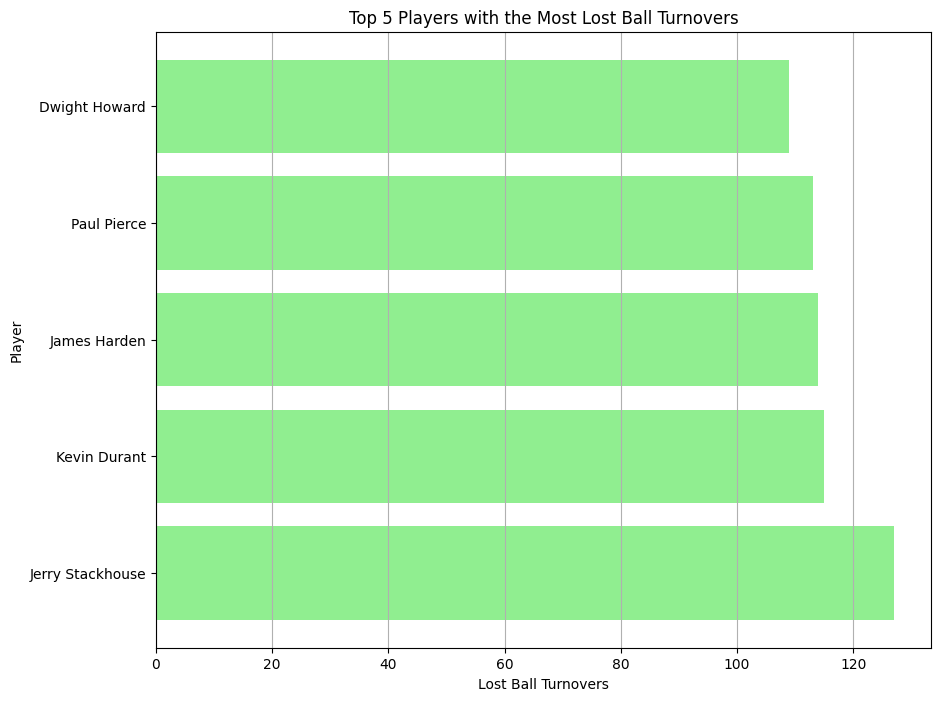

In [ ]:
top_lost_ball = df.sort_values(by='lost_ball_turnover', ascending=False).head(8) #The count is at 8 because some players have similar numbers that causes only 5 to show up.

# Plotting the chart for lost ball turnovers
plt.figure(figsize=(10, 8))
plt.barh(top_lost_ball['player'], top_lost_ball['lost_ball_turnover'], color='lightgreen')
plt.xlabel('Lost Ball Turnovers')
plt.ylabel('Player')
plt.title('Top 5 Players with the Most Lost Ball Turnovers')
plt.grid(axis='x')

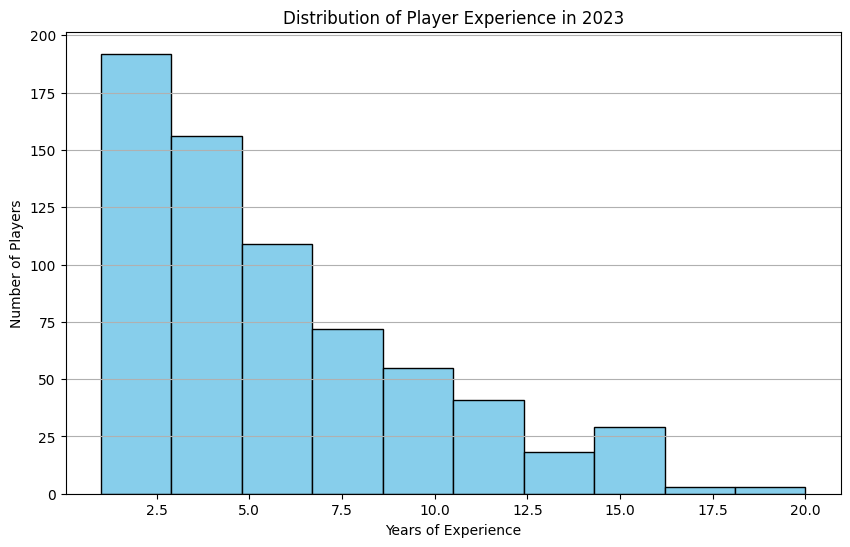

In [ ]:
# Filter for the year 2023
df_2023 = df[df['season'] == 2023]

# Histogram of player experience for 2023
plt.figure(figsize=(10, 6))
plt.hist(df_2023['experience'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Player Experience in 2023')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Players')
plt.grid(axis='y')
plt.show()

This dataset is used from Kaggle.com. https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats?resource=download

The source changes down here because I wanted to compare the different types of shots that the players took. I find it interested how some players have their "sweet spots" and some players might not even take shots in the time they play.

In [ ]:
df = pd.read_csv('Player Shooting.csv')

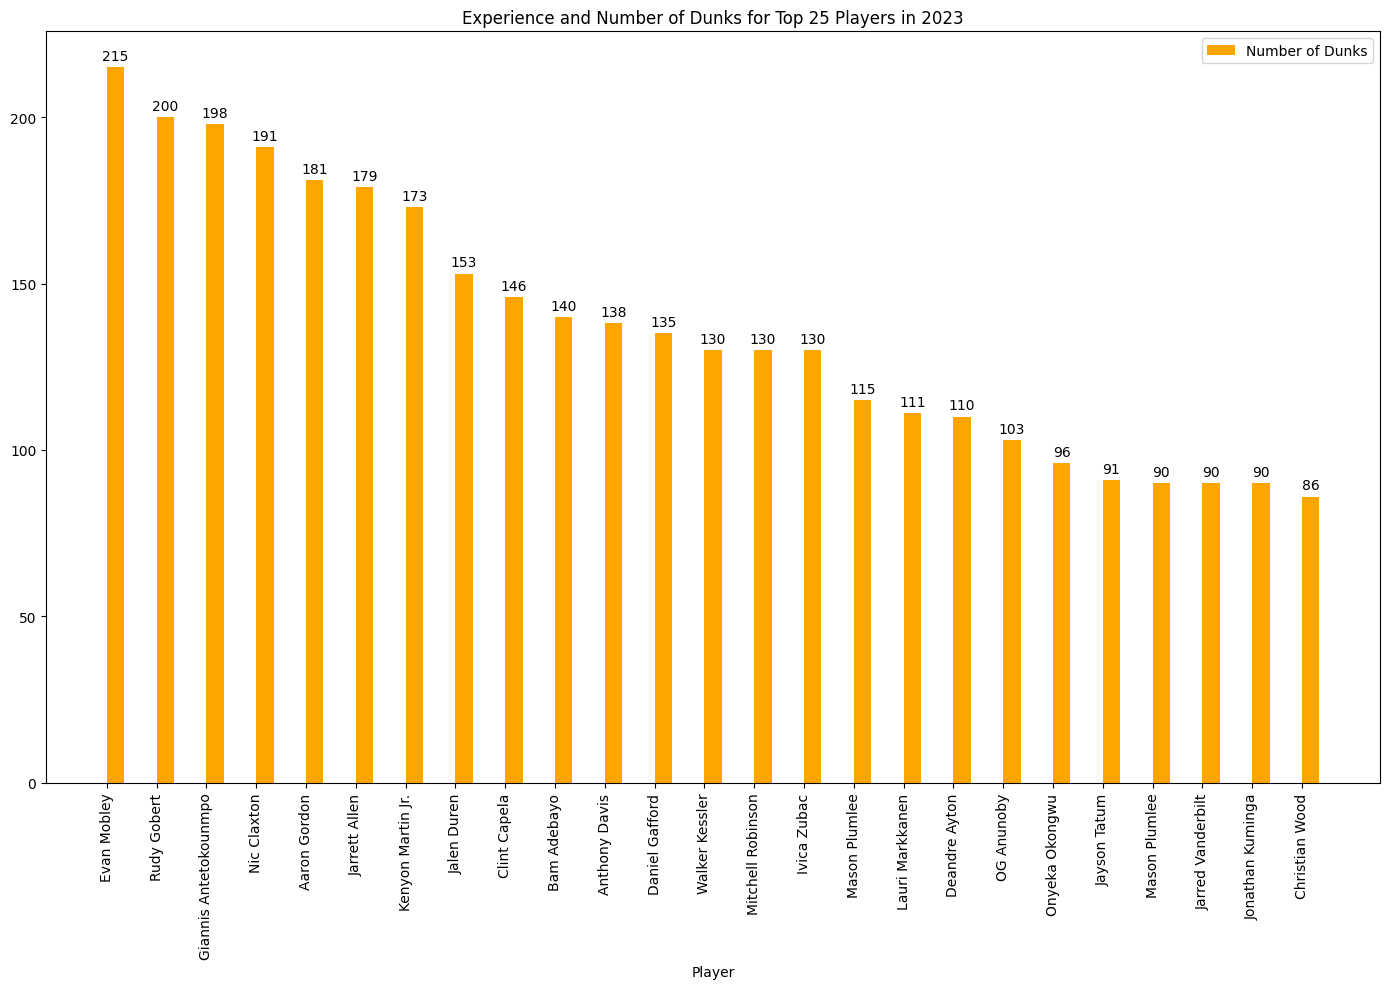

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filter for the year 2023
df_2023 = df[df['season'] == 2023]

# Sort by 'num_of_dunks' to find the top 25 players in 2023
top_25_dunks_2023 = df_2023.sort_values(by='num_of_dunks', ascending=False).head(25)

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(14, 10))

# Calculate bar positions
bar_width = 0.35
index = np.arange(len(top_25_dunks_2023))

# Plot number of dunks
bars = ax.bar(index + bar_width/2, top_25_dunks_2023['num_of_dunks'], bar_width, label='Number of Dunks', color='orange')

# Add labels above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars)

# Add some text for labels, title, and axes ticks
ax.set_xlabel('Player')
ax.set_title('Experience and Number of Dunks for Top 25 Players in 2023')
ax.set_xticks(index)
ax.set_xticklabels(top_25_dunks_2023['player'], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()



In [ ]:
df_all_star = pd.read_csv('All-Star Selections.csv')

In [ ]:
# Filter for the 2023 selections
df_2023_selections = df_all_star[df_all_star['season'] == 2023]

# Extract and sort the list of selected players
selected_players_2023 = sorted(df_2023_selections['player'].unique())

# Print the list with numbering and aligned names
print("All-Star Game Selections in 2023:\n")
for i, player in enumerate(selected_players_2023, start=1):
    print(f"{i}. {player}")


All-Star Game Selections in 2023:

1. Anthony Edwards
2. Bam Adebayo
3. Damian Lillard
4. De'Aaron Fox
5. DeMar DeRozan
6. Domantas Sabonis
7. Donovan Mitchell
8. Giannis Antetokounmpo
9. Ja Morant
10. Jaren Jackson Jr.
11. Jaylen Brown
12. Jayson Tatum
13. Joel Embiid
14. Jrue Holiday
15. Julius Randle
16. Kevin Durant
17. Kyrie Irving
18. Lauri Markkanen
19. LeBron James
20. Luka Dončić
21. Nikola Jokić
22. Pascal Siakam
23. Paul George
24. Shai Gilgeous-Alexander
25. Stephen Curry
26. Tyrese Haliburton
27. Zion Williamson
